## 미분기초

수학적 표현? 사물의 변화가 다른사물에 어떤 변화를 주는가.

ex) 운전 : 속도 변화

시간 변화 -> 속도 변화

강우량 변화 -> 식물의 키 변화

힘 변화 -> 용수철 길이 변화

In [1]:
import numpy as np


In [12]:
def AND(x1, x2):
    #구현
    b=-0.6
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    hf=np.sum(x*w)+b
    
    if hf<=0:
        return 0
    else:
        return 1

for data in[(0,0),(0,1),(1,0),(1,1)]: #0 0 0 1
    print(AND(data[0],data[1]))

0
0
0
1


In [14]:
def NAND(x1, x2):
    #구현
    b=0.6
    x=np.array([x1,x2])
    w=np.array([-0.5,-0.5])
    hf=np.sum(x*w)+b
    
    if hf<=0:
        return 0
    else:
        return 1

for data in[(0,0),(0,1),(1,0),(1,1)]: #1 1 1 0
    print(NAND(data[0],data[1]))

1
1
1
0


In [16]:
def OR(x1, x2):
    #구현
    b=-0.1
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    hf=np.sum(x*w)+b
    
    if hf<=0:
        return 0
    else:
        return 1

for data in[(0,0),(0,1),(1,0),(1,1)]: #0 1 1 1 
    print(OR(data[0],data[1]))

0
1
1
1


In [18]:
#AND, NAND, OR함수를 적절히 호출하여 XOR를 함수를 구현하시오.

def XOR(x1, x2):
    #구현
    r1=NAND(x1,x2)
    r2=OR(x1,x2)
    y=AND(r1,r2)
    return y

for data in[(0,0),(0,1),(1,0),(1,1)]: #0 1 1 0
    print(XOR(data[0],data[1]))

0
1
1
0


## Activation Function 

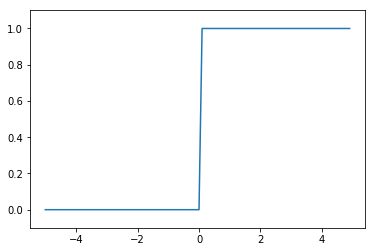

In [24]:
#Step Function : 계단함수

import matplotlib.pyplot as plt


def step_function(x):
    return np.array(x>0, dtype=np.int)
x=np.arange(-5.0, 5.0, 0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) #y축 범위 지정
plt.show()

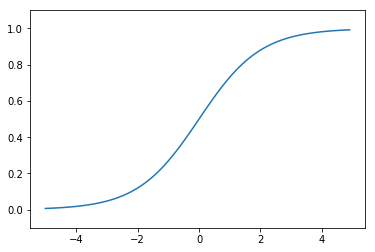

In [25]:
#Sigmoid Function : 시그모이드

def sigmoid_function(x):
    return 1 / (1+np.exp(-x))

x=np.arange(-5.0, 5.0, 0.1)
y=sigmoid_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) #y축 범위 지정
plt.show()


# 계단함수와 시그모이드 함수의 중요한 공통점은 둘다 비선형 함수이다. 
#선형함수란 출력이 입력의 상수배 만큼 변하는 함수. 즉 F(x)=ax+b 형태.
# 비선형함수란 직선 하나로 그릴수 없는 함수. 신경망에서는 은닉층이 쌓여야 하기 때문에 비선형함수를 사용해야한다.
# h(x)=cx를 활성화함수로 사용한 3층 네트워크를 생각해 보면 y(x)= h(h(h(x)))가 되고, y(x)=c*c*c*x처럼 곱셈을 세번 수행하면 실은 
# y(x)=ax와 똑같은 식. 

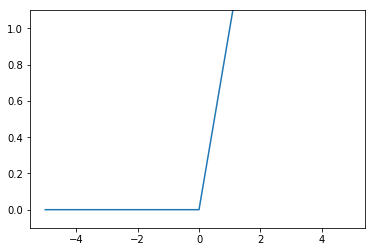

In [27]:
def ReLU_function(x):
    return np.maximum(0,x)

x=np.arange(-5.0, 5.0, 0.1)
y=ReLU_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) #y축 범위 지정
plt.show()

## Titanic data Using MLP

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

In [148]:
train=pd.read_csv("titanic/train.csv")
test=pd.read_csv("titanic/test.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [149]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
titanic=pd.concat([train, test], ignore_index=True) #train, test 합치기
titanic

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [151]:
train=pd.DataFrame()
test=pd.DataFrame()

In [152]:
def extract_df():
    tr_df=titanic.loc[titanic["Survived"].notnull()]
    te_df=titanic.loc[titanic["Survived"].isnull()]
    
    return tr_df, te_df
train, test=extract_df()

In [153]:
titanic["title"]=titanic["Name"].str.extract(" ([A-Za-z]+)\.")

In [154]:
titanic["title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Ms            2
Mlle          2
Sir           1
Jonkheer      1
Lady          1
Don           1
Countess      1
Capt          1
Mme           1
Dona          1
Name: title, dtype: int64

In [155]:
titanic

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,Mr
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Dona
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,Mr
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,Mr


In [156]:
train, test=extract_df()

In [157]:
train.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [158]:
#Age컬럼 0,1로 변환
train["Sex"]=np.where(train["Sex"]=="male",0,1)
test["Sex"]=np.where(test["Sex"]=="male",0,1)

In [159]:
#Pclass,Embarked 원핫인코딩
train=pd.get_dummies(data=train, columns=["Embarked","Pclass"], prefix=["Embarked","Pclass"])
train
test=pd.get_dummies(data=test, columns=["Embarked","Pclass"], prefix=["Embarked","Pclass"])
test

,Age,Cabin,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,title,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
891,34.5,NaN,7.8292,"Kelly, Mr. James",0,892,0,0,NaN,330911,Mr,0,1,0,0,0,1
892,47.0,NaN,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,1,1,NaN,363272,Mrs,0,0,1,0,0,1
893,62.0,NaN,9.6875,"Myles, Mr. Thomas Francis",0,894,0,0,NaN,240276,Mr,0,1,0,0,1,0
894,27.0,NaN,8.6625,"Wirz, Mr. Albert",0,895,0,0,NaN,315154,Mr,0,0,1,0,0,1
895,22.0,NaN,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,1,1,NaN,3101298,Mrs,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,8.0500,"Spector, Mr. Woolf",0,1305,0,0,NaN,A.5. 3236,Mr,0,0,1,0,0,1
1305,39.0,C105,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,NaN,PC 17758,Dona,1,0,0,1,0,0
1306,38.5,NaN,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,0,0,NaN,SOTON/O.Q. 3101262,Mr,0,0,1,0,0,1
1307,NaN,NaN,8.0500,"Ware, Mr. Frederick",0,1308,0,0,NaN,359309,Mr,0,0,1,0,0,1


In [160]:
train.loc[train["title"]=="Mr","Age"]=train.loc[train["title"]=="Mr","Age"].fillna(32.4)
train.loc[train["title"]=="Miss","Age"]=train.loc[train["title"]=="Miss","Age"].fillna(21.8)
train.loc[train["title"]=="Mrs","Age"]=train.loc[train["title"]=="Mrs","Age"].fillna(35.9)
train.loc[train["title"]=="Dr","Age"]=train.loc[train["title"]=="Dr","Age"].fillna(42.0)
train.loc[train["title"]=="Master","Age"]=train.loc[train["title"]=="Master","Age"].fillna(4.6)

In [161]:
train

,Age,Cabin,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,title,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,0,1,0.0,A/5 21171,Mr,0,0,1,0,0,1
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1.0,PC 17599,Mrs,1,0,0,1,0,0
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282,Miss,0,0,1,0,0,1
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1.0,113803,Mrs,0,0,1,1,0,0
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,5,0,0,0.0,373450,Mr,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,13.0000,"Montvila, Rev. Juozas",0,887,0,0,0.0,211536,Rev,0,0,1,0,1,0
887,19.0,B42,30.0000,"Graham, Miss. Margaret Edith",0,888,1,0,1.0,112053,Miss,0,0,1,1,0,0
888,21.8,NaN,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,1,1,0.0,W./C. 6607,Miss,0,0,1,0,0,1
889,26.0,C148,30.0000,"Behr, Mr. Karl Howell",0,890,0,0,1.0,111369,Mr,1,0,0,1,0,0


In [162]:
#필요없는 컬럼 삭제
#titanic.drop(["PassengerId", "Name", "Ticket","Cabin","title"],axis=1, inplace=True)
train.drop(["PassengerId", "Name", "Ticket","Cabin","title"],axis=1, inplace=True)
test.drop(["PassengerId", "Name", "Ticket","Cabin","title"],axis=1, inplace=True)

In [163]:
train

,Age,Fare,Parch,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,7.2500,0,0,1,0.0,0,0,1,0,0,1
1,38.0,71.2833,0,1,1,1.0,1,0,0,1,0,0
2,26.0,7.9250,0,1,0,1.0,0,0,1,0,0,1
3,35.0,53.1000,0,1,1,1.0,0,0,1,1,0,0
4,35.0,8.0500,0,0,0,0.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,0,0,0.0,0,0,1,0,1,0
887,19.0,30.0000,0,1,0,1.0,0,0,1,1,0,0
888,21.8,23.4500,2,1,1,0.0,0,0,1,0,0,1
889,26.0,30.0000,0,0,0,1.0,1,0,0,1,0,0


In [169]:
y_train_age=train["Age"]
x_train_age=train.drop("Age",axis=1, inplace=True)

In [170]:
x_train_age

In [ ]:
#표준화
from sklearn import preprocessing
scaler2=preprocessing.StandardScaler().fit(x_train_age)
scaler2
x_train_age=scaler2.transform(x_train_age)
x_predict_age=scaler2.transform(y_train_age)

In [67]:
Age_None_list=titanic[titanic["Age"].isnull()].index.tolist()
Age_None_list

[5,
 17,
 19,
 26,
 28,
 29,
 31,
 32,
 36,
 42,
 45,
 46,
 47,
 48,
 55,
 64,
 65,
 76,
 77,
 82,
 87,
 95,
 101,
 107,
 109,
 121,
 126,
 128,
 140,
 154,
 158,
 159,
 166,
 168,
 176,
 180,
 181,
 185,
 186,
 196,
 198,
 201,
 214,
 223,
 229,
 235,
 240,
 241,
 250,
 256,
 260,
 264,
 270,
 274,
 277,
 284,
 295,
 298,
 300,
 301,
 303,
 304,
 306,
 324,
 330,
 334,
 335,
 347,
 351,
 354,
 358,
 359,
 364,
 367,
 368,
 375,
 384,
 388,
 409,
 410,
 411,
 413,
 415,
 420,
 425,
 428,
 431,
 444,
 451,
 454,
 457,
 459,
 464,
 466,
 468,
 470,
 475,
 481,
 485,
 490,
 495,
 497,
 502,
 507,
 511,
 517,
 522,
 524,
 527,
 531,
 533,
 538,
 547,
 552,
 557,
 560,
 563,
 564,
 568,
 573,
 578,
 584,
 589,
 593,
 596,
 598,
 601,
 602,
 611,
 612,
 613,
 629,
 633,
 639,
 643,
 648,
 650,
 653,
 656,
 667,
 669,
 674,
 680,
 692,
 697,
 709,
 711,
 718,
 727,
 732,
 738,
 739,
 740,
 760,
 766,
 768,
 773,
 776,
 778,
 783,
 790,
 792,
 793,
 815,
 825,
 826,
 828,
 832,
 837,
 839,
 84

### MLP Regressor 

In [135]:
from sklearn.neural_network import MLPRegressor
MLR=MLPRegressor(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(50,50))
MLR.fit(x_train_age, y_train_age)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [136]:
MLR.score(x_train_age, y_train_age)

0.5484471970948455

In [ ]:
for a,b in zip(np.array(y_train_age),mlr.predict(x_train_age)):
    print(a, " ", b)

### + MLP Classfier 는 Day.1에 이어서 해놓았음.